In [89]:
# Importing libraries - 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")
import copy

## Business Case: Yulu - Hypothesis Testing 

### About Yulu 

1. Yulu is India's leading micro-mobility service provider, which offers unqiue vechile for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user  friendly mobile app to enable shared, solo and sustainable commuting. 

2. Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices etc) to make those first and last miles smooth, affordable, and convenient.

3. Yulu has recently suffered considerable dips in its revenues. The have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market. 

### Problem Statement - 

The company wants to know -
1. Which variable are siginificant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands?

### Analyzing Basic Metrics -

In [3]:
data = pd.read_csv("bike_sharing.txt")

In [4]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
data.shape

(10886, 12)

#### Dataset contains 10886 rows and 12 columns. 

In [6]:
data.size

130632

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


1. The columns season, holiday, workingday, weather, humidity, casual, registered, count are of integer datatype, and the column 
datetime is object type and rest are of float.
2. There are no null values. 


In [8]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [52]:
## Converting the datatype of datetime column from object to datetime -  

data["datetime"] = pd.to_datetime(data["datetime"])
cat_cols = ["season", "holiday", "workingday", "weather"]
for col in cat_cols:
    data[col] = data[col].astype("object")



In [55]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [11]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


####  Time period of data when it is given - 

In [12]:
data["datetime"].min()

Timestamp('2011-01-01 00:00:00')

In [13]:
data["datetime"].max()

Timestamp('2012-12-19 23:00:00')

In [14]:
data["datetime"].max() - data["datetime"].min()

Timedelta('718 days 23:00:00')

In [15]:
data["day"] = data["datetime"].dt.day_name()

In [16]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.


In [17]:
## Season: season (1: spring, 2: summer, 3: fall, 4: winter)
data["season"].replace({ 1 : "spring", 2 : "summer" , 3 : "fall", 4 : "winter"}, inplace = True)


In [18]:
## Cheking the season contribution - 

np.round(data["season"].value_counts(normalize = True) * 100, 2)

winter    25.11
summer    25.11
fall      25.11
spring    24.67
Name: season, dtype: float64

In [19]:
## Checking the whether day is a holiday or not in percent - 

np.round(data["holiday"].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [20]:
## Cheking its working day or holiday -   

np.round(data["workingday"].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

#### Workingday - 

1 - neither weekend nor holiday    

0 - it's holiday


In [21]:
np.round(data["weather"].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

#### Weather:
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Distribution of seasons - 



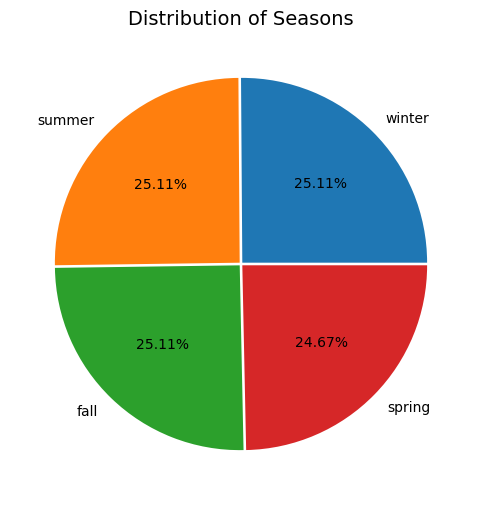

In [22]:
plt.figure(figsize = (8,6))

season = np.round(data["season"].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = season["season"], labels = season.index, autopct = '%.2f%%', explode = [0.01, 0.01, 0.01, 0.01])

plt.title("Distribution of Seasons", fontdict = {'fontsize' : 14, 'fontweight' : 400})

plt.show()

### Distribution of Holiday - 

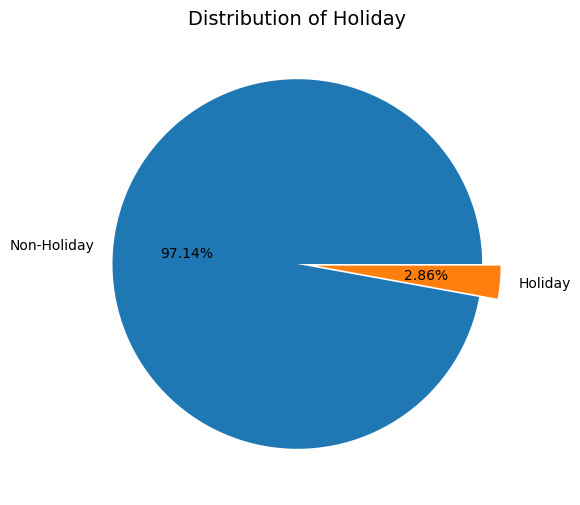

In [23]:
plt.figure(figsize = (8,6))

holiday = np.round(data["holiday"].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = holiday["holiday"], 
        explode = [0, 0.1], 
        labels = ["Non-Holiday", "Holiday"],
        autopct = "%.2f%%")

plt.title("Distribution of Holiday", fontdict = {'fontsize' : 14,
                                                 'fontweight' : 400})

plt.show()

### Distribution of Workingday - 

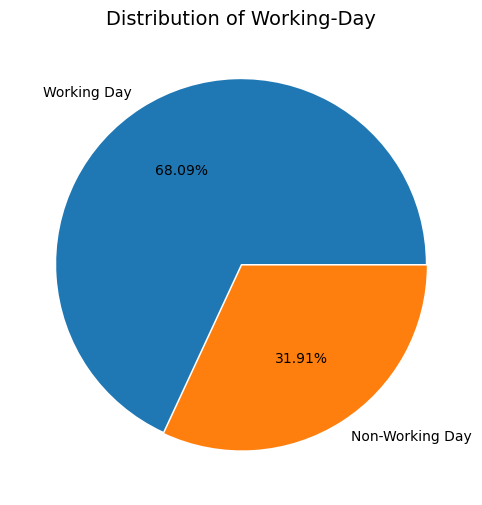

In [24]:
plt.figure(figsize = (8,6))

workingday = np.round(data["workingday"].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = workingday["workingday"],
        explode = [0, 0.01],
        labels = ["Working Day", "Non-Working Day"],
        autopct = "%.2f%%")

plt.title("Distribution of Working-Day", fontdict = {'fontsize': 14,
                                                    'fontweight' : 400})

plt.show()

### Distribution of Weather -

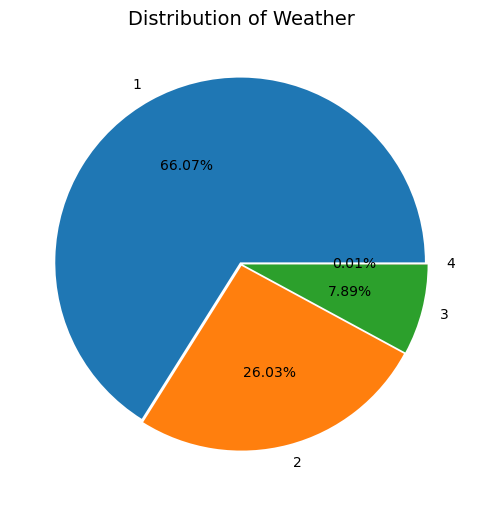

In [25]:
plt.figure(figsize = (8,6))

weather = np.round(data["weather"].value_counts(normalize = True) * 100, 2).to_frame()

plt.pie(x = weather["weather"],
        explode = [0.01, 0.01, 0.01, 0.01],
        labels = weather.index,
        autopct = "%.2f%%")

plt.title("Distribution of Weather", fontdict = {'fontsize' : 14,
                                                 'fontweight' : 400})

plt.show()


## Univariate Analysis - 

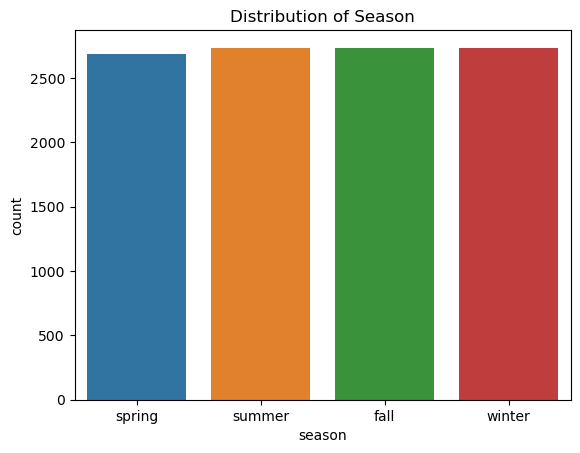

In [26]:
# Distribution of season - Count Plot 

sns.countplot(data = data, x = "season")

plt.title("Distribution of Season")

plt.show()

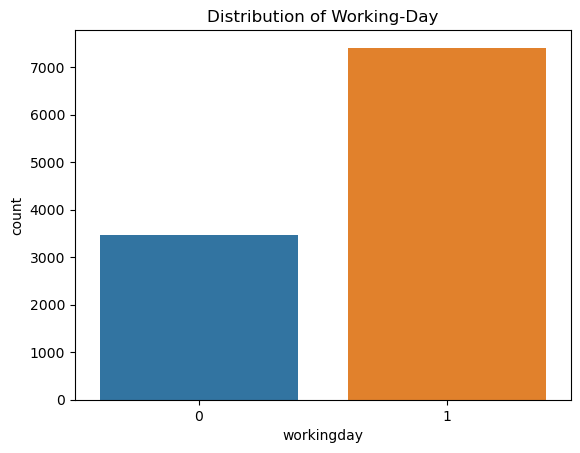

In [28]:
# Distribution of Workingday- 

sns.countplot(data = data, x = "workingday")
plt.title("Distribution of Working-Day")
plt.show()

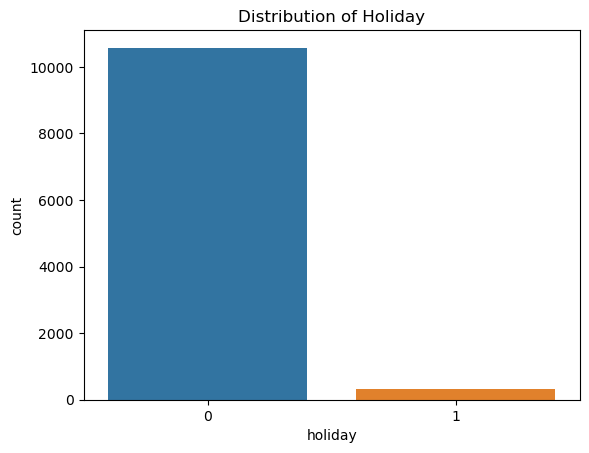

In [27]:
# Distribution of Holiday - 

sns.countplot(data = data, x = "holiday")
plt.title("Distribution of Holiday")
plt.show()

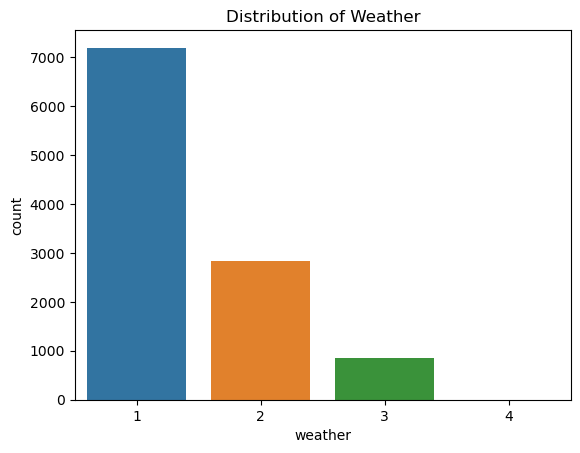

In [100]:
# Distribution of Weather - 

sns.countplot(data = data, x= "weather")
plt.title("Distribution of Weather")
plt.show()

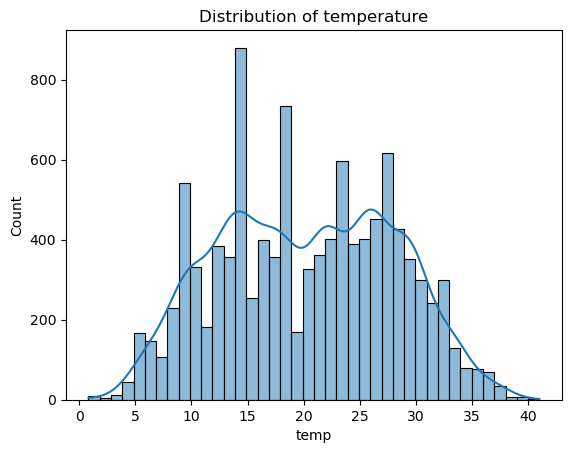

In [30]:
#  Distribution of Temperature values in the dataset -  Histplot

sns.histplot(data = data, x = "temp", kde = True, bins = 40)
plt.title("Distribution of temperature")
plt.show()

In [31]:
temp_mean = np.round(data["temp"].mean(),2)
temp_std = np.round(data["temp"].std(),2)

temp_mean, temp_std

(20.23, 7.79)

The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectivley.

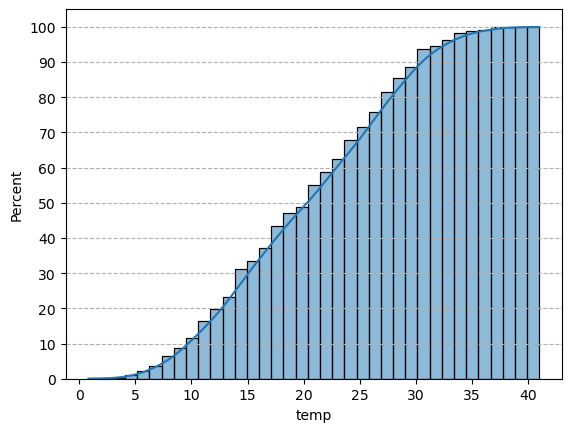

In [32]:
# Cumulative distribution of temperature values - Histplot 

sns.histplot(data = data, x = "temp", kde = True, cumulative = True, stat = "percent")
plt.grid(axis = "y", linestyle = "--")
plt.yticks(np.arange(0, 101, 10))
plt.show()

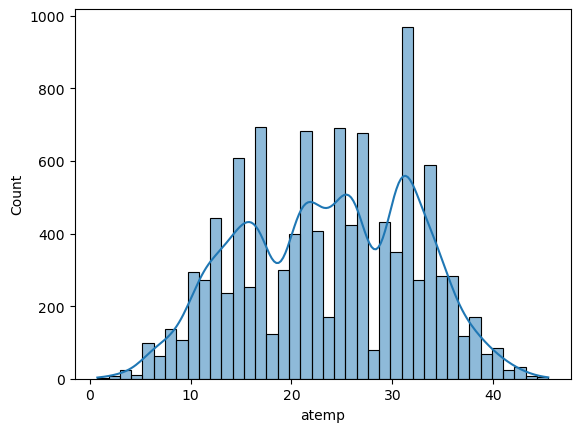

In [33]:
# Distribution of  feeling temperature in the dataset - Histplot

sns.histplot(data = data, x = "atemp", kde = True, bins = 40)
plt.show()
  

In [34]:
atemp_mean = np.round(data["atemp"].mean(), 2)
atemp_std = np.round(data["atemp"].std(),2)

atemp_mean, atemp_std

(23.66, 8.47)

The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

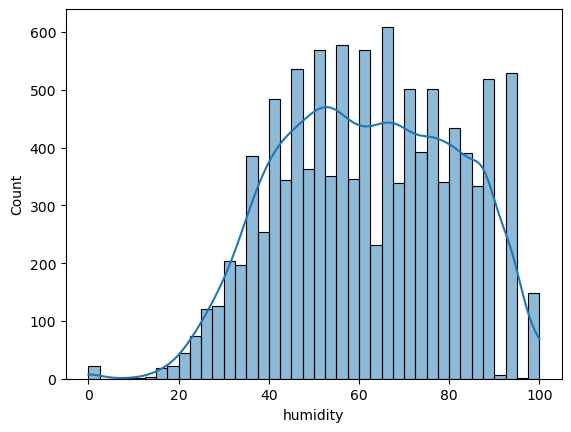

In [35]:
# Distribution of humidity values in the dataset - Histogram plot 

sns.histplot(data = data, x = "humidity", kde = True, bins = 40)
plt.show()

In [36]:
humidity_mean = np.round(data["humidity"].mean(),2)
humidity_std = np.round(data["humidity"].std(),2)

humidity_mean, humidity_std

(61.89, 19.25)

The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

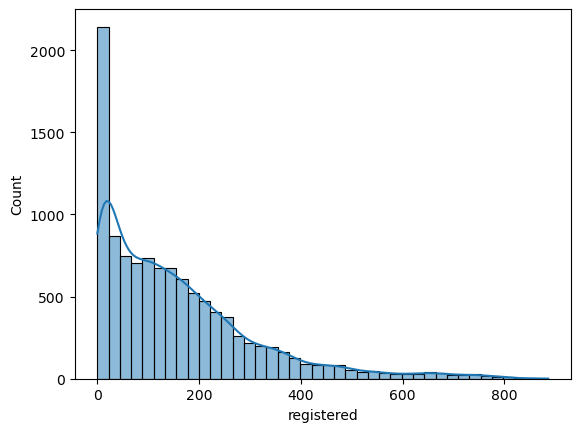

In [37]:
# Histogram plot for the registered feature, showing the distribution of ragistered users values in the dataset - 

sns.histplot(data = data, x = "registered", kde = True, bins = 40)
plt.show()

## Outliers Detection - 

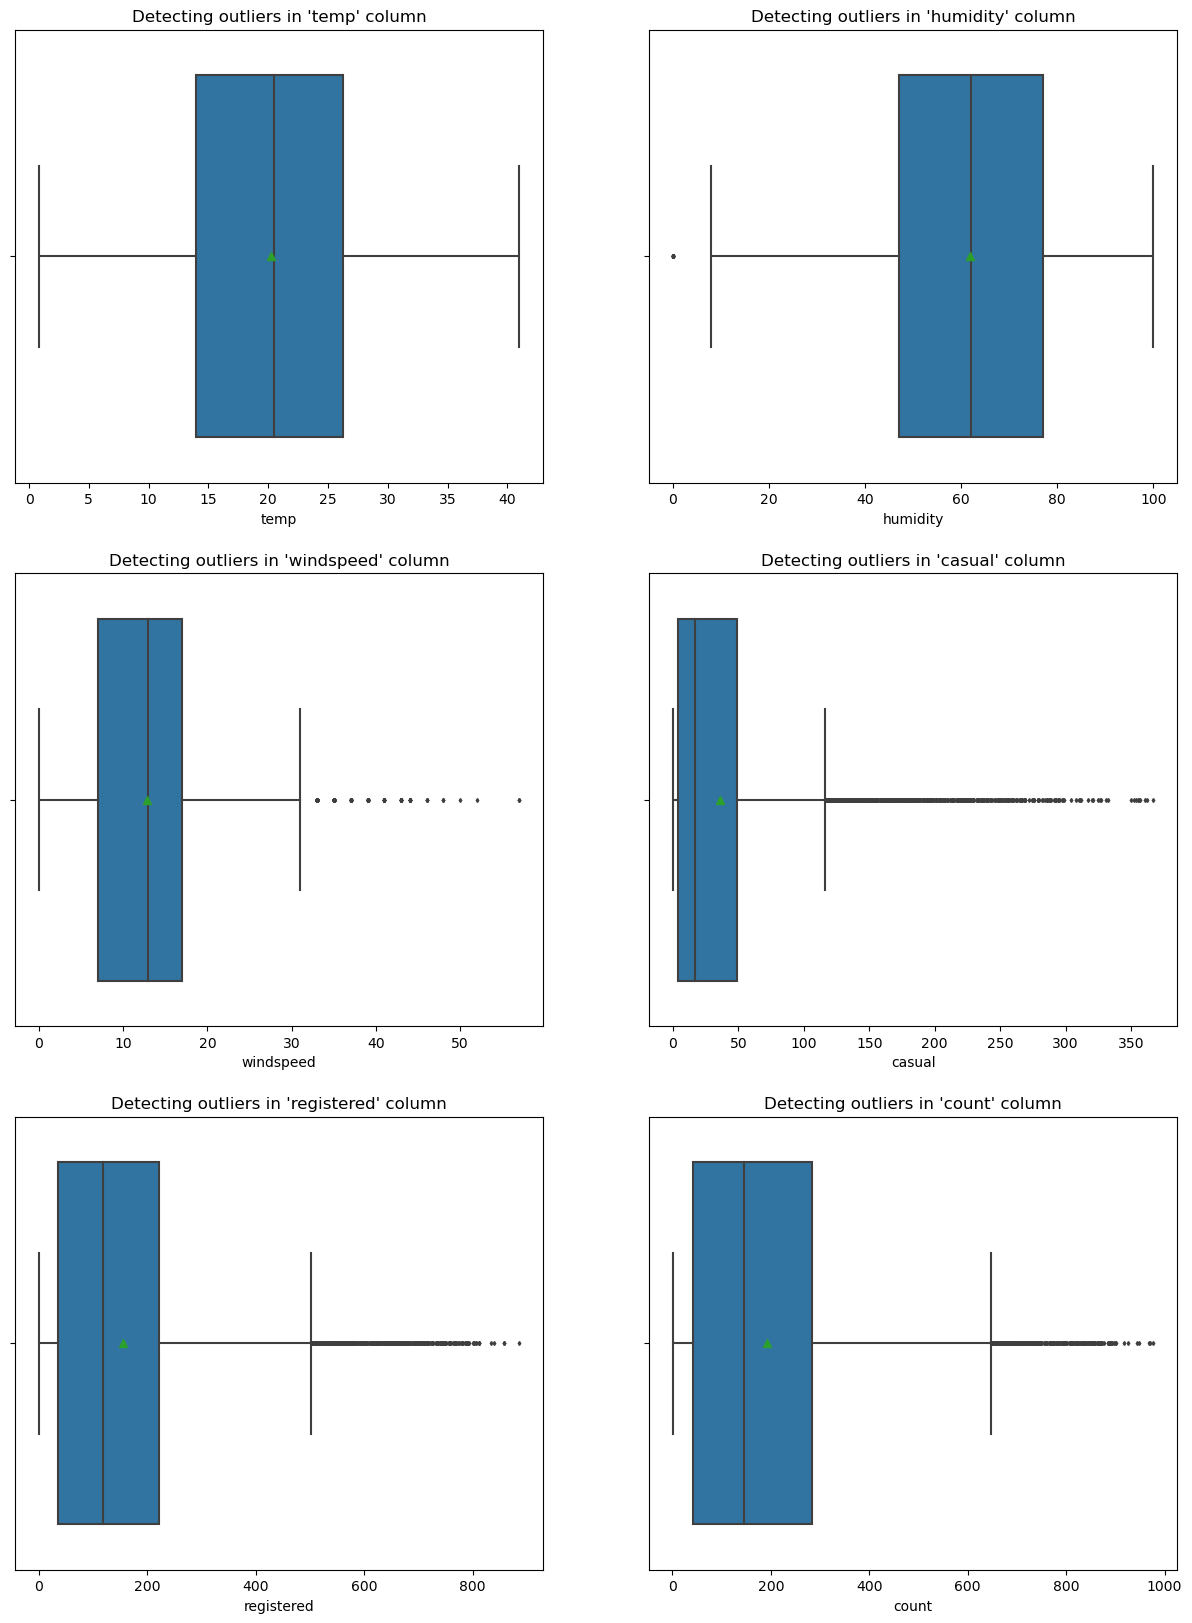

In [38]:
# Outliers Detection

columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1

plt.figure(figsize = (15, 20))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = data, x = data[i], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1


## Bivariate Analysis - 

[]

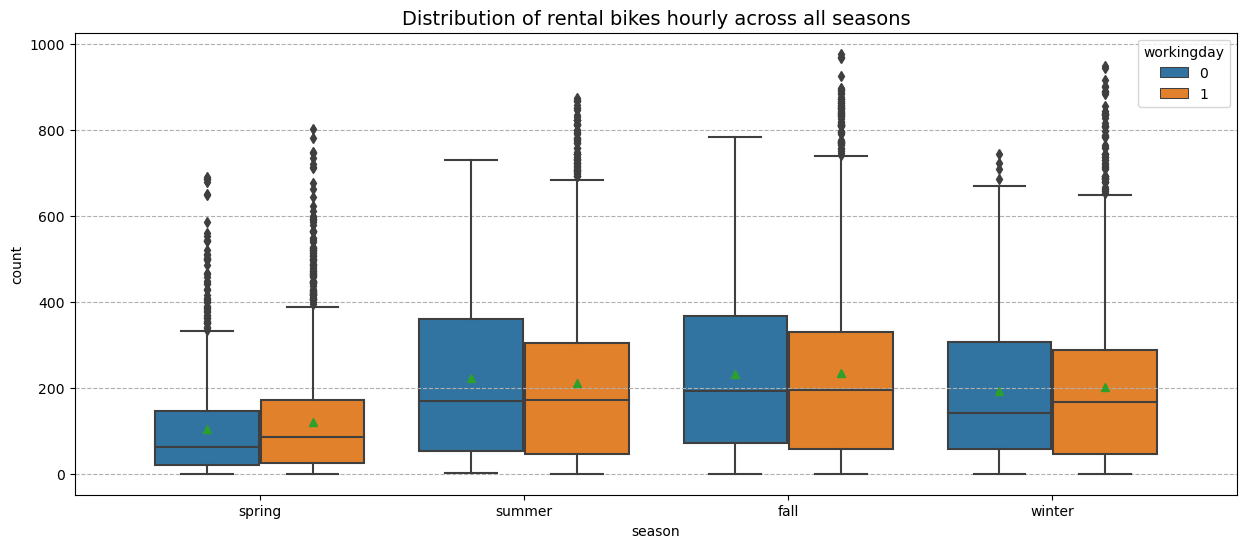

In [39]:
# Distribution of hourly count of total rental bikes across all seasons - Box plot 

plt.figure(figsize = (15,6))

sns.boxplot(data = data, x ="season", y = "count", hue = "workingday", showmeans = True)
plt.grid(axis = "y", linestyle = "--")

plt.title("Distribution of rental bikes hourly across all seasons",
          fontdict = {"size" : 14,
                      "fontweight" : 400})

plt.plot()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter season. It is generally low in the spring season.

[]

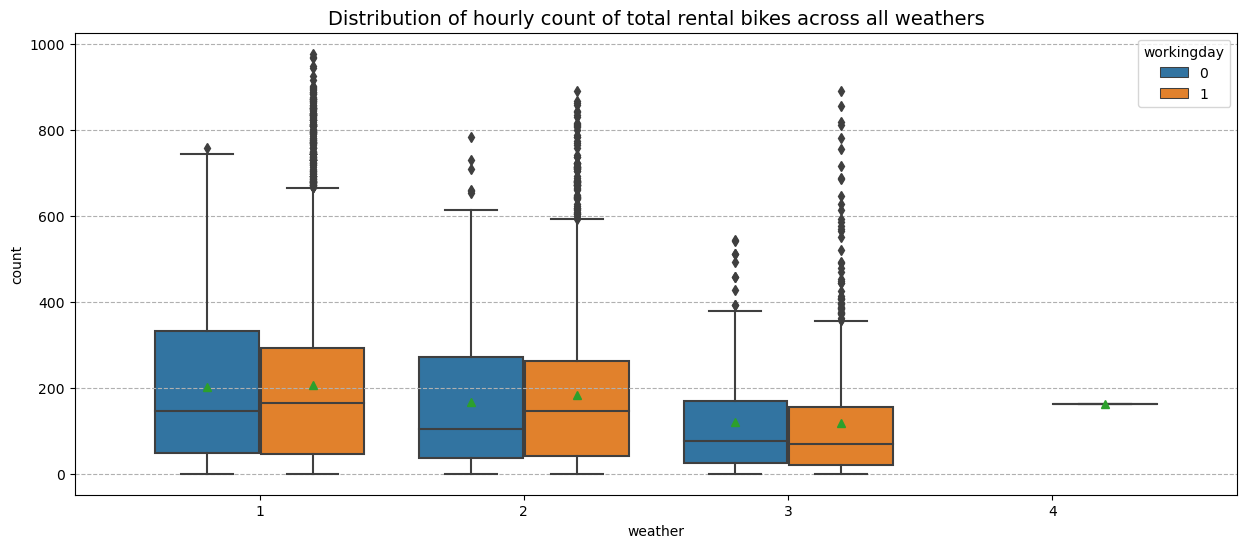

In [46]:
# Distribution of hourly count of total rental bikes across all weathers - Box Plot

plt.figure(figsize = (15, 6))

sns.boxplot(data = data, x = "weather", y = "count", hue = "workingday", showmeans = True)
plt.grid(axis = "y", linestyle = "--")

plt.title("Distribution of hourly count of total rental bikes across all weathers",
          fontdict = {"size" : 14,
                      "fontweight" : 400})

plt.plot()

1. The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather.
2. There are very less data for extreme weather conditions

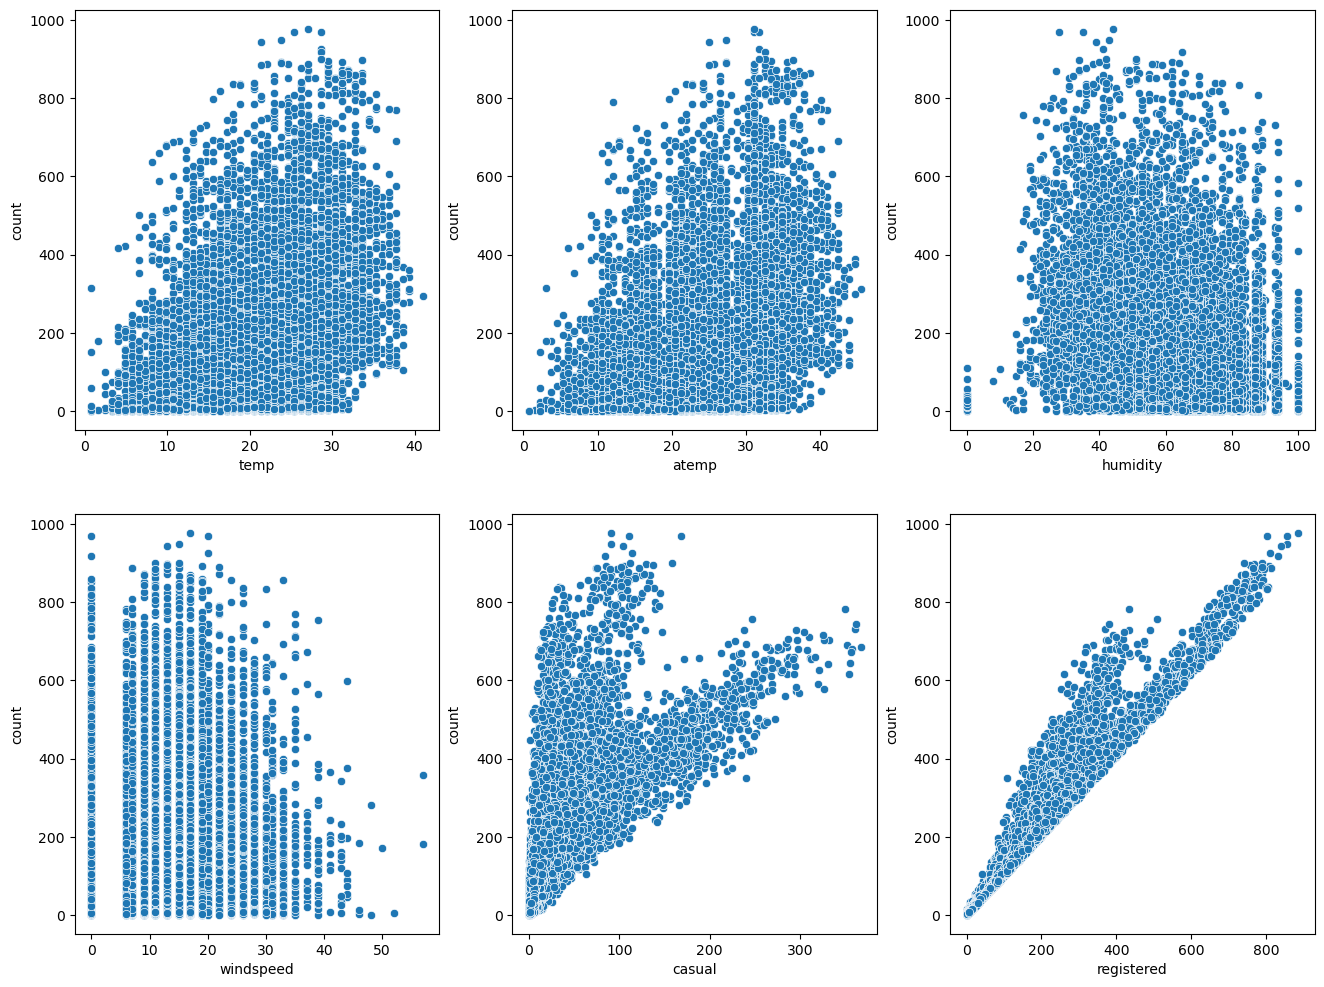

In [57]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[index], y='count', ax=axis[row,col])
        index += 1
plt.show()



1. Whenever the humidity is less than 20, number of bikes rented is very very low.
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 35, number of bikes rented is less.

In [58]:
data.corr()["count"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12344\554967672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["count"]


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12344\2568213011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


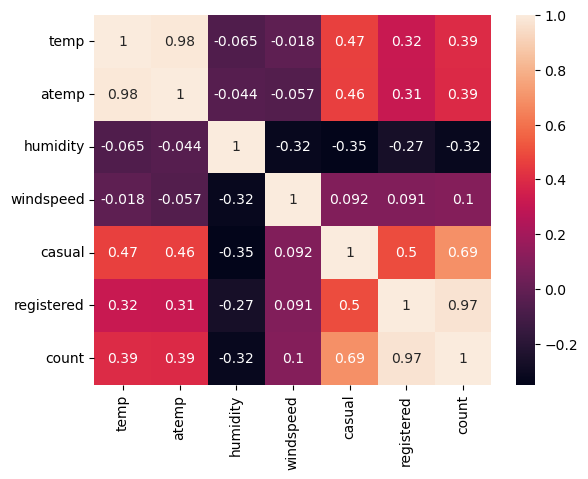

In [59]:
sns.heatmap(data.corr(), annot = True)
plt.show()


### Effect of Working day on the number of electric cycles rented



In [43]:
data.groupby( by = "workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

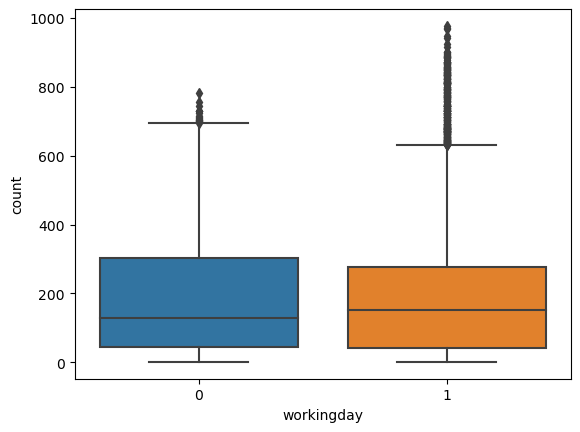

In [44]:
sns.boxplot(data = data, x = "workingday", y = "count" )
plt.plot()

### Hypothesis Testing - 1 

Null Hypothesis (H0) :  Weather is independent of the season.

Alternative Hypothesis (Ha) : Weather is not independent of the season.

Significance Level (alpha) :
alpha = 0.05

We will use chi-square test to test hypothesis defined above

In [63]:
data_table = pd.crosstab(data["season"], data["weather"])
print("Observed values: ")
data_table

Observed values: 


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [67]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values


array([[1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [69]:
 nrows, ncols = 4, 4
    
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)

alpha = 0.05

chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])

chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis i.e. Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis i.e. Weather is independent of the season")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis i.e. Weather is dependent on the season.


### Hypothesis Testing - 2

Null Hypothesis (H0) : Working day has no effect on the number of cycles being rented.
    
Alternative Hypothesis (Ha) : Working day has effect on the number of cycles being rented.
    
Significance Level (alpha) :
alpha = 0.05

We will use the 2-Sample T-Test to test the hypothesis defined above.

In [70]:
group1 = data[data["workingday"] == 0]["count"].values
group2 = data[data["workingday"] == 1]["count"].values

np.var(group1), np.var(group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T- Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have the equal variance.

Here, the ratio is 34040.70 / 30171.35 which less than 4:1

In [71]:
stats.ttest_ind(a = group1, b = group2, equal_var = True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since the p-value is greater than 0.05 so we can not reject the Null Hypothesis.
We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.



### Hypothesis Testing - 3

Null Hypothesis (H0) : Number of cycles rented is similiar in different weather and season.

Alternative Hypothesis (Ha) : Number of cycles rented is not similar in different weather and season.
    
Significance Level (alpha) :
alpha = 0.05

Here, we will use the ANOVA to test the hypothesis defined above.


In [97]:
group1 = data[data["weather"] == 1]["count"].values
group2 = data[data["weather"] == 2]["count"].values
group3 = data[data["weather"] == 3]["count"].values
group4 = data[data["weather"] == 4]["count"].values

group5 = data[data["season"] == 1]["count"].values
group6 = data[data["season"] == 2]["count"].values
group7 = data[data["season"] == 3]["count"].values
group8 = data[data["season"] == 4]["count"].values


In [98]:
# One - way anova - 

stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=nan, pvalue=nan)

## Insights - 

1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes are rented.
3. There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
4. The hourly total number of rental bikes is statistically different for different weathers.
5. Whenever its a holiday more bikes are rented.
6. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
7. Whenever the humidity is less than 20, number of bikes rented is very very low.
8. Whenever the tempereature is less than 10, number of bikes rented is less.
9. Whenever the windspeed is greater than 35, number of bikes rented is less.


## Recommendations - 

1. In summer and fall seasons the company should have more bikes in stock to be rented, because the demand in these seasons is higher as compared to other seasons.
2. Offer seasonal discounts or special packages to attract more customers during the spring and winter seasons to attract more customer during these periods.
3. Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.
4. Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.
5.  Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly.
6.  Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

7. With significance level of 0.05, workingday has no effect on the number of bikes being rented.

8. In very low humid days, company should have less bikes in the stock to be rented.
9. Whenever temperatrue is less than 10 or in very cold days, company should have less bikes.
10. Anaylyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes.
 